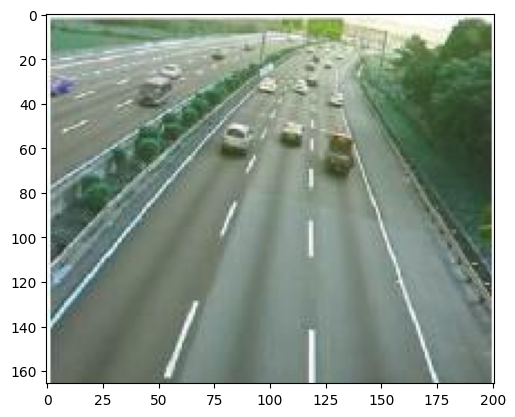

In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lanewithout.png')

plt.imshow(img)

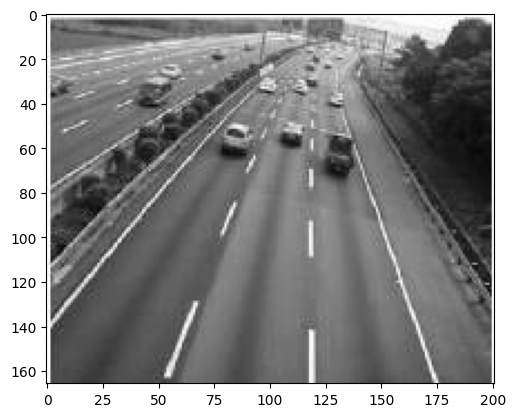

In [87]:
img4= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img4, cmap = plt.get_cmap('gray'))

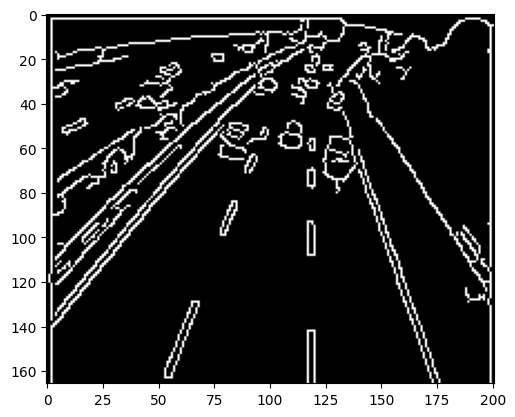

In [88]:
#canny edge detection

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
canny = cv2.Canny(blur,50,150)
plt.imshow(canny,cmap='gray')

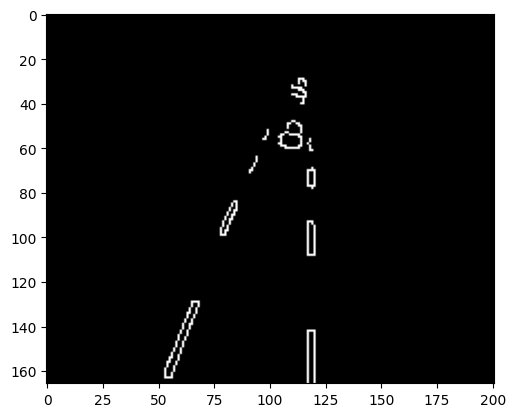

In [89]:
def region_of_interest(image):
    height = image.shape[0]
    polygons= np.array([
                            [(44, height), (129, height), (115, 20)]
                        ])
    mask = np.zeros_like(image) # returns the zeroes matrix of same shape as image
    cv2.fillPoly(mask, polygons, 255) # it draws filled polygons (image, polygon, colour)
    segment = cv2.bitwise_and(image, mask) #masking the unncessary portions using  bitwise and operation
    return segment
plt.imshow(region_of_interest(canny),cmap='gray')

In [90]:
lines = cv2.HoughLinesP(region_of_interest(canny), 2, np.pi / 180, 25, np.array([]), minLineLength = 40, maxLineGap = 40)
print(lines) #reutrns lines in polar coordinate which when converted to cartesian helps to find points on the edge

[[[113  29 120 165]]

 [[ 55 163  85  84]]

 [[118 142 119  69]]

 [[114  29 118  93]]

 [[ 53 163  83  85]]

 [[ 56 161  99  53]]

 [[116  30 120 108]]]


In [91]:
#function to display lines detected by hough transform

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),4)
    return line_image

[[[113  29 120 165]]

 [[ 55 163  85  84]]

 [[118 142 119  69]]

 [[114  29 118  93]]

 [[ 53 163  83  85]]

 [[ 56 161  99  53]]

 [[116  30 120 108]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


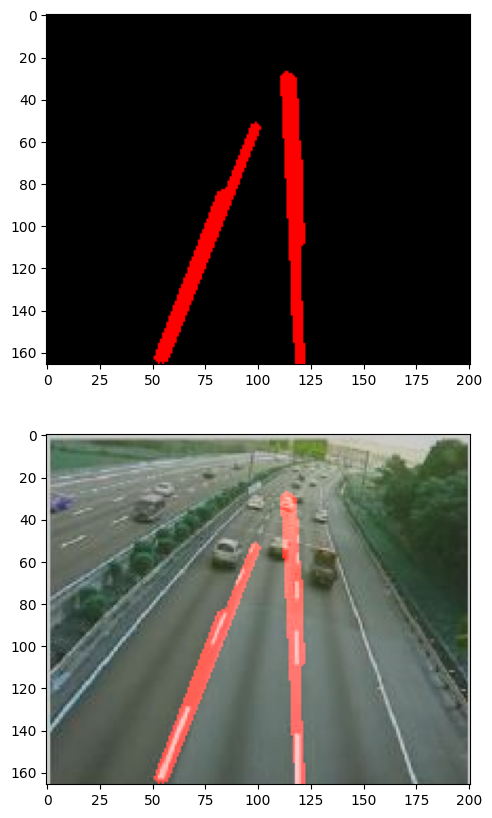

In [92]:
laneimg = np.copy(img)
gray = cv2.cvtColor(laneimg, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
canny = cv2.Canny(blur,50,150)
#plt.imshow(canny,cmap='gray')
cropped_img = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_img, 2, np.pi / 180, 25, np.array([]), minLineLength = 40, maxLineGap = 40)
print(lines)
line_image = display_lines(laneimg,lines)
print(line_image)
overlay_img = cv2.addWeighted(laneimg,0.8,line_image,1,1) #adding two images with intensity given



plt.figure(2,figsize=(10,10))
plt.subplot(211)
plt.imshow(line_image,cmap='gray')

plt.subplot(212)
plt.imshow(overlay_img)
plt.show()

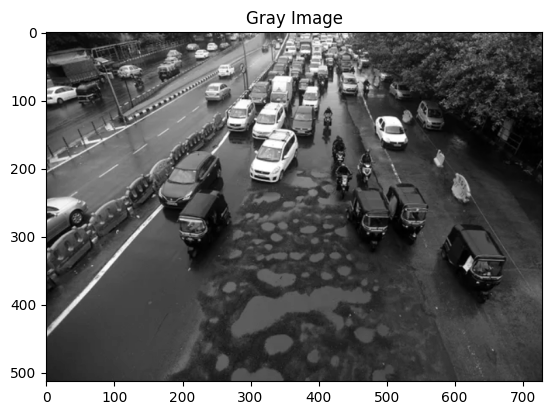

In [93]:
image = cv2.imread('test3.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image,cmap = 'gray')
plt.title('Gray Image')

plt.show()

(([], []), ([], []))

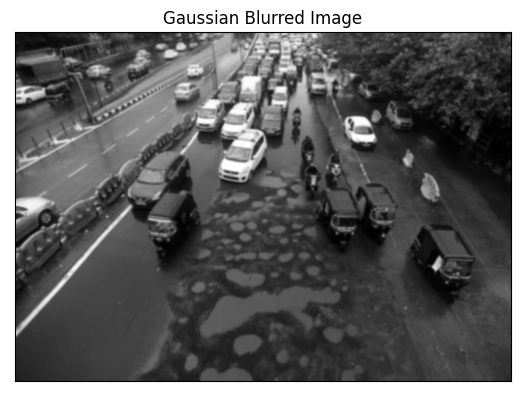

In [94]:
#Gaussian Filter
blur = cv2.GaussianBlur(gray_image,(5,5),0)

plt.imshow(blur,cmap = 'gray')

plt.title('Gaussian Blurred Image')

plt.xticks([]), plt.yticks([])

In [95]:
#Image Segmentation : Otsu's method 
#fg/bg threshold
ret, thresh = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [96]:
# noise removal (Opening morphology)
#for more visibility
#small holes
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [97]:
# sure background area (Dilation morphology)

sure_bg = cv2.dilate(opening,kernel,iterations = 1)

In [98]:
# Finding sure foreground area

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

(([], []), ([], []))

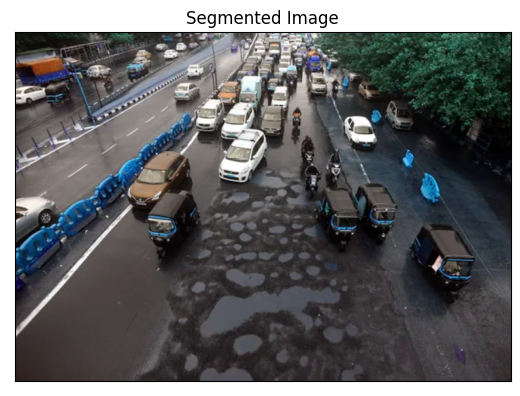

In [99]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(image,cmap = 'gray')

plt.title('Segmented Image')
plt.xticks([]), plt.yticks([])

In [100]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]


(([], []), ([], []))

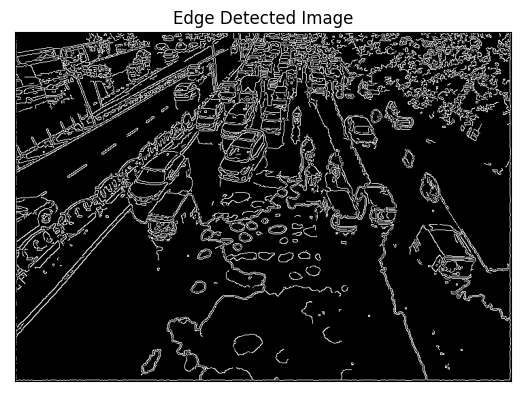

In [101]:
#Canny Edge Detection
edges = cv2.Canny(image,100,200)

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Detected Image')
plt.xticks([]), plt.yticks([])

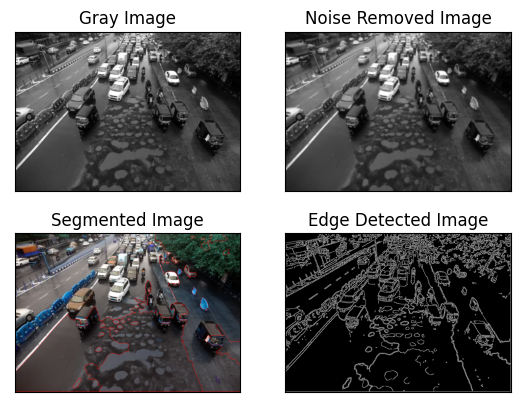

In [102]:
# Plotting the graphs
plt.subplot(221)
plt.imshow(gray_image,cmap = 'gray')
plt.title('Gray Image')
plt.xticks([]), plt.yticks([])


plt.subplot(222)
plt.imshow(blur,cmap = 'gray')
plt.title('Noise Removed Image')
plt.xticks([]), plt.yticks([])


plt.subplot(223)
plt.imshow(image,cmap = 'gray')
plt.title('Segmented Image')
plt.xticks([]), plt.yticks([])


plt.subplot(224)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Detected Image')
plt.xticks([]), plt.yticks([])


plt.savefig('edge.png')
plt.show()
cv2.waitKey(0)                 # Waits forever for user to press any key
cv2.destroyAllWindows()        # Closes displayed windows